In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:


import sys

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)

from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier as rf , GradientBoostingClassifier as gb
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [3]:
#df= pd.read_csv("Cancer_Data.csv") para correr localmente
#df

In [4]:
df= pd.read_csv("/content/drive/MyDrive/dataframes/Cancer_Data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**PUNTO 2. EDA**

In [6]:
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Aquí observamos la estadistica descriptiva, donde entre todos los calculos podemos notar que todas las variables tienen 569 muestras. A todas se les puEdo hacer su estadistica ya que son variables numericas, teniendo como excepción la ultima, a la cual le haremos un tratamiento en los proximos pasos.

In [7]:
#Determinación de valores nulos
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Como se evidenció solo la variable "Unnamed" es nula y cuenta con las 569 nulas.

Cabe resaltar que cada caracteritica se repite 3 veces, pero son medidas diferentes, _mean, _se, _worst:

_mean: el promedio del valor en todos los núcleos celulares de la imagen.Ejemplo: radius_mean = promedio del radio de todos los núcleos.

_se: el error estándar (standard error) de la medida. Representa la variabilidad o dispersión de ese valor entre los núcleos. Ejemplo: radius_se = cuánto varía el radio entre los distintos núcleos.

_worst: el valor máximo o el valor más extremo observado (en una ventana de 10 núcleos con mayor media).

/tmp/ipython-input-3451827734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='diagnosis', data=df, palette=palette, order=['B', 'M'])
/tmp/ipython-input-3451827734.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Benigno (B)', 'Maligno (M)'])


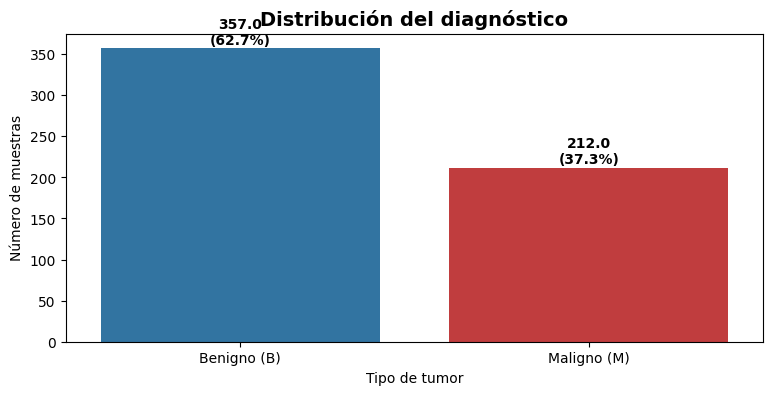

Conteo de clases:
 diagnosis
B    357
M    212
Name: count, dtype: int64


In [8]:
palette = {'B': '#1f77b4', 'M': '#d62728'}
plt.figure(figsize=(9,4))
ax = sns.countplot(x='diagnosis', data=df, palette=palette, order=['B', 'M'])
ax.set_xticklabels(['Benigno (B)', 'Maligno (M)'])
plt.title("Distribución del diagnóstico", fontsize=14, fontweight='bold')
plt.xlabel("Tipo de tumor")
plt.ylabel("Número de muestras")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,  # posición
            f'{height}\n({height/len(df)*100:.1f}%)',  # valor + porcentaje
            ha="center", fontsize=10, fontweight="bold", color="black")

plt.show()
print("Conteo de clases:\n", df['diagnosis'].value_counts())



Con este gráfico de barras podemos observar el porcentaje y la cantidad de datos pertenecientes a cada clase. Al parecer está desbalanceado el data set, al tener mayor cantidad de datos en los beningnos, esto suele pasar mucho en los datasets de medicina, ya que por lo general son mas los pacientes sanos que enfermos. Por ello haremos una evaluación para concluir si es necesario hacer un balance de estos datos.

GRÁFICOS

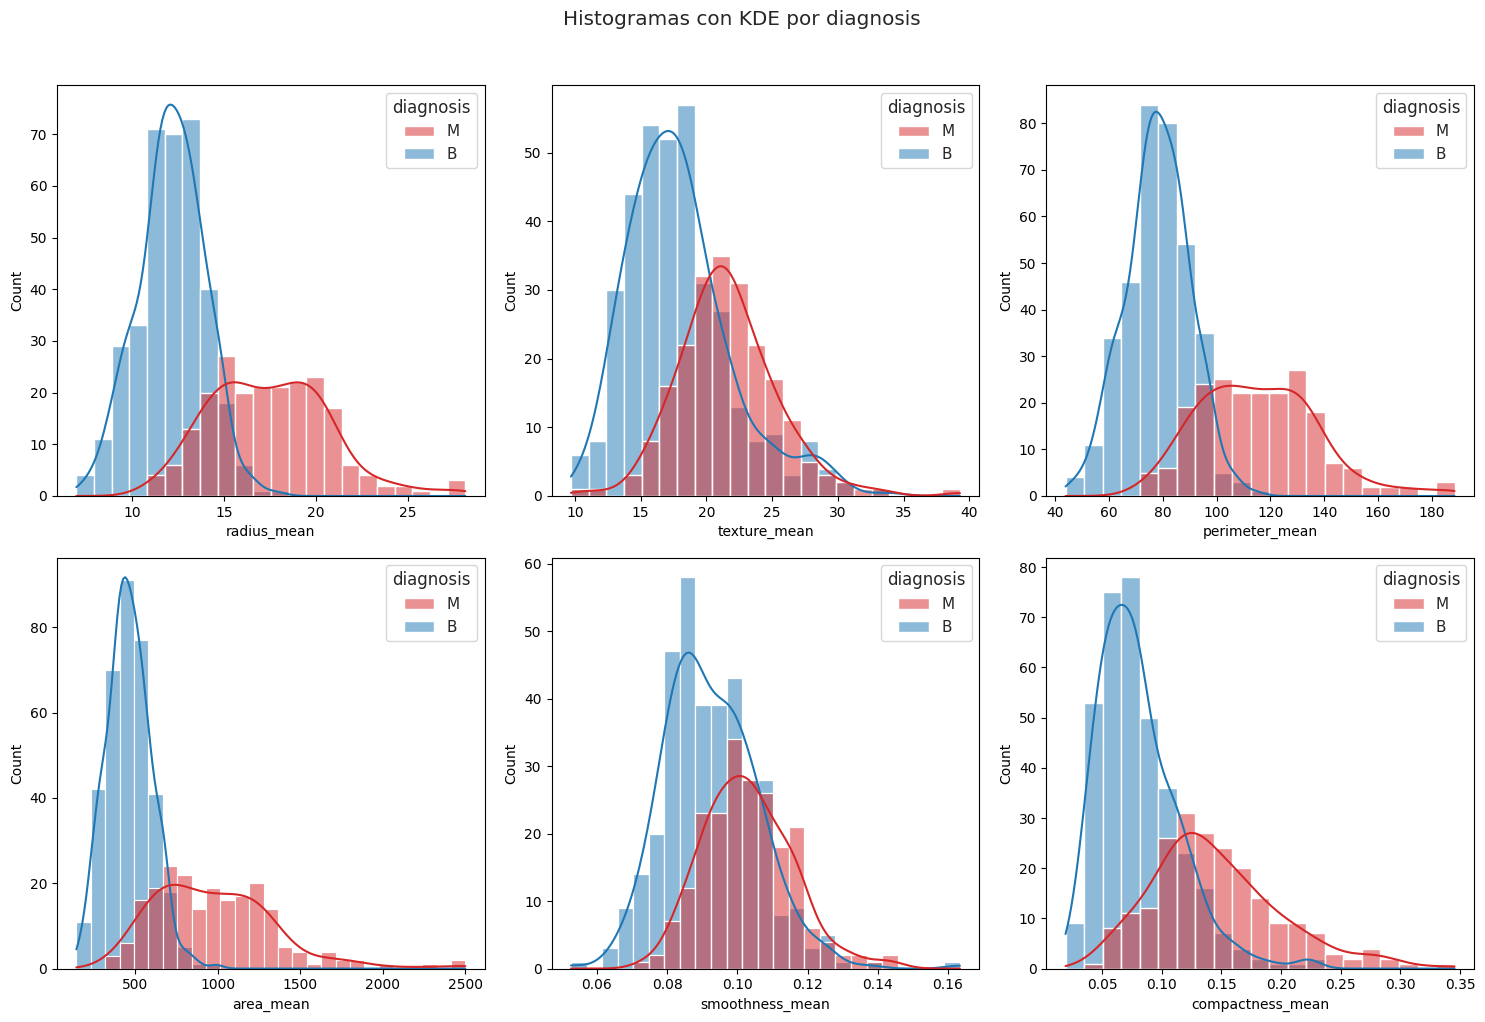

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.set(style="whitegrid")
colors = {'B': '#1f77b4', 'M': '#d62728'}

sns.histplot(df, x="radius_mean", hue="diagnosis", kde=True, ax=axes[0,0], palette=colors)
sns.histplot(df, x="texture_mean", hue="diagnosis", kde=True, ax=axes[0,1],palette=colors)
sns.histplot(df, x="perimeter_mean", hue="diagnosis", kde=True, ax=axes[0,2],palette=colors)
sns.histplot(df, x="area_mean", hue="diagnosis", kde=True, ax=axes[1,0],palette=colors)
sns.histplot(df, x="smoothness_mean", hue="diagnosis", kde=True, ax=axes[1,1],palette=colors)
sns.histplot(df, x="compactness_mean", hue="diagnosis", kde=True, ax=axes[1,2],palette=colors)

plt.suptitle("Histogramas con KDE por diagnosis", y=1.02)
plt.tight_layout()
plt.show()

**HISTOGRAMAS**

Seleccioné diferentes variables para analizar y comparar como se distribuye cada variable segun el diganóstico.
Aquí se utilizó histograma + KDE, lo cual nos permite ver esa división de la variable en diferentes intervalos(bins) con el histograma y una curva suavizada que intenta estimar la función de densidad de probabilidad de la variable (KDE) Kernel Density Estimate, la cual hace más fácil ver picos, simetría y diferencias entre distribuciones.

¿Qué nos aporta esto para los modelos?

Separabilidad de clases: Por ejemplo en area_mean, los malignos se concentran en valores más altos, indica que esta variable ayuda mucho al modelo.

Detección de solapamiento: Si las curvas de M y B se solapan mucho por ejemplo en texture_mean, significa que esa variable por sí sola no distingue bien las clases. Entonces si sirve pero mejor combinada con otras.

Selección de features: Variables con distribuciones similares entre M y B aportan poco, se podrán descartar si se deseaa para simplificar.



/tmp/ipython-input-386425631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y="radius_mean", data=df, palette=colors, ax=axes[0])
/tmp/ipython-input-386425631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y="area_mean", data=df, palette=colors, ax=axes[1])
/tmp/ipython-input-386425631.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y="perimeter_mean", data=df, palette=colors, ax=axes[2])


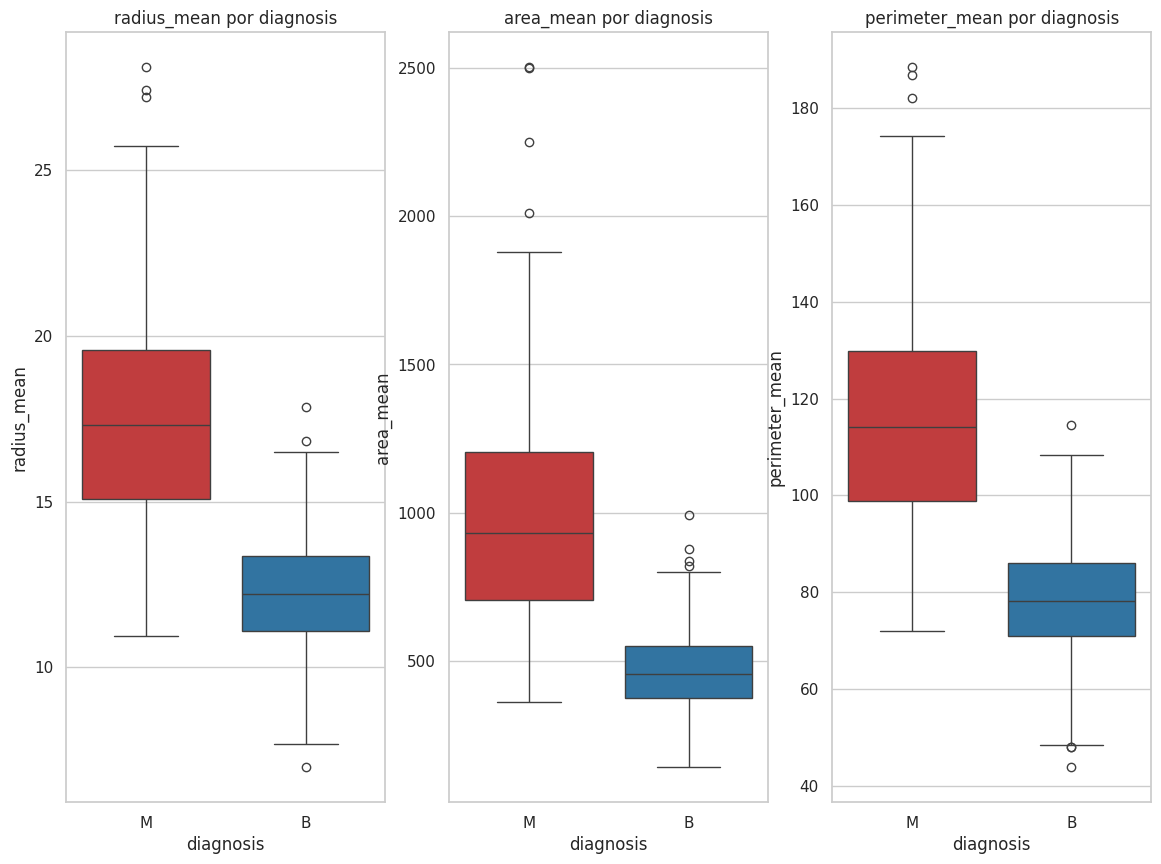

<Figure size 640x480 with 0 Axes>

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(14, 10))

sns.boxplot(x="diagnosis", y="radius_mean", data=df, palette=colors, ax=axes[0])
axes[0].set_title("radius_mean por diagnosis")

sns.boxplot(x="diagnosis", y="area_mean", data=df, palette=colors, ax=axes[1])
axes[1].set_title("area_mean por diagnosis")

sns.boxplot(x="diagnosis", y="perimeter_mean", data=df, palette=colors, ax=axes[2])
axes[2].set_title("perimeter_mean por diagnosis")
plt.show()

plt.tight_layout()
plt.show()

Al analizar estos boxplots de estas dos variables que gracias a los gráficos anteriores puedo considerar influyentes; se evidencia que hay pocos outliers, lo que nos indica que nos sirven para una buena clasificación.

**CORRELACIÓN**

Para evaluar la correlación entre las variables, realizaremos un heat map de correlación, para así detectar multicolinealidad, lo cual para modelos sensibles a esto como: regresión logística, SVM lineales o kNN, puede resultar en que le modelo sea menos estable y más dificil de interpretar. Pero esto lo podremos solucionar si eliminamos algunas de estas o aplicando PCA.

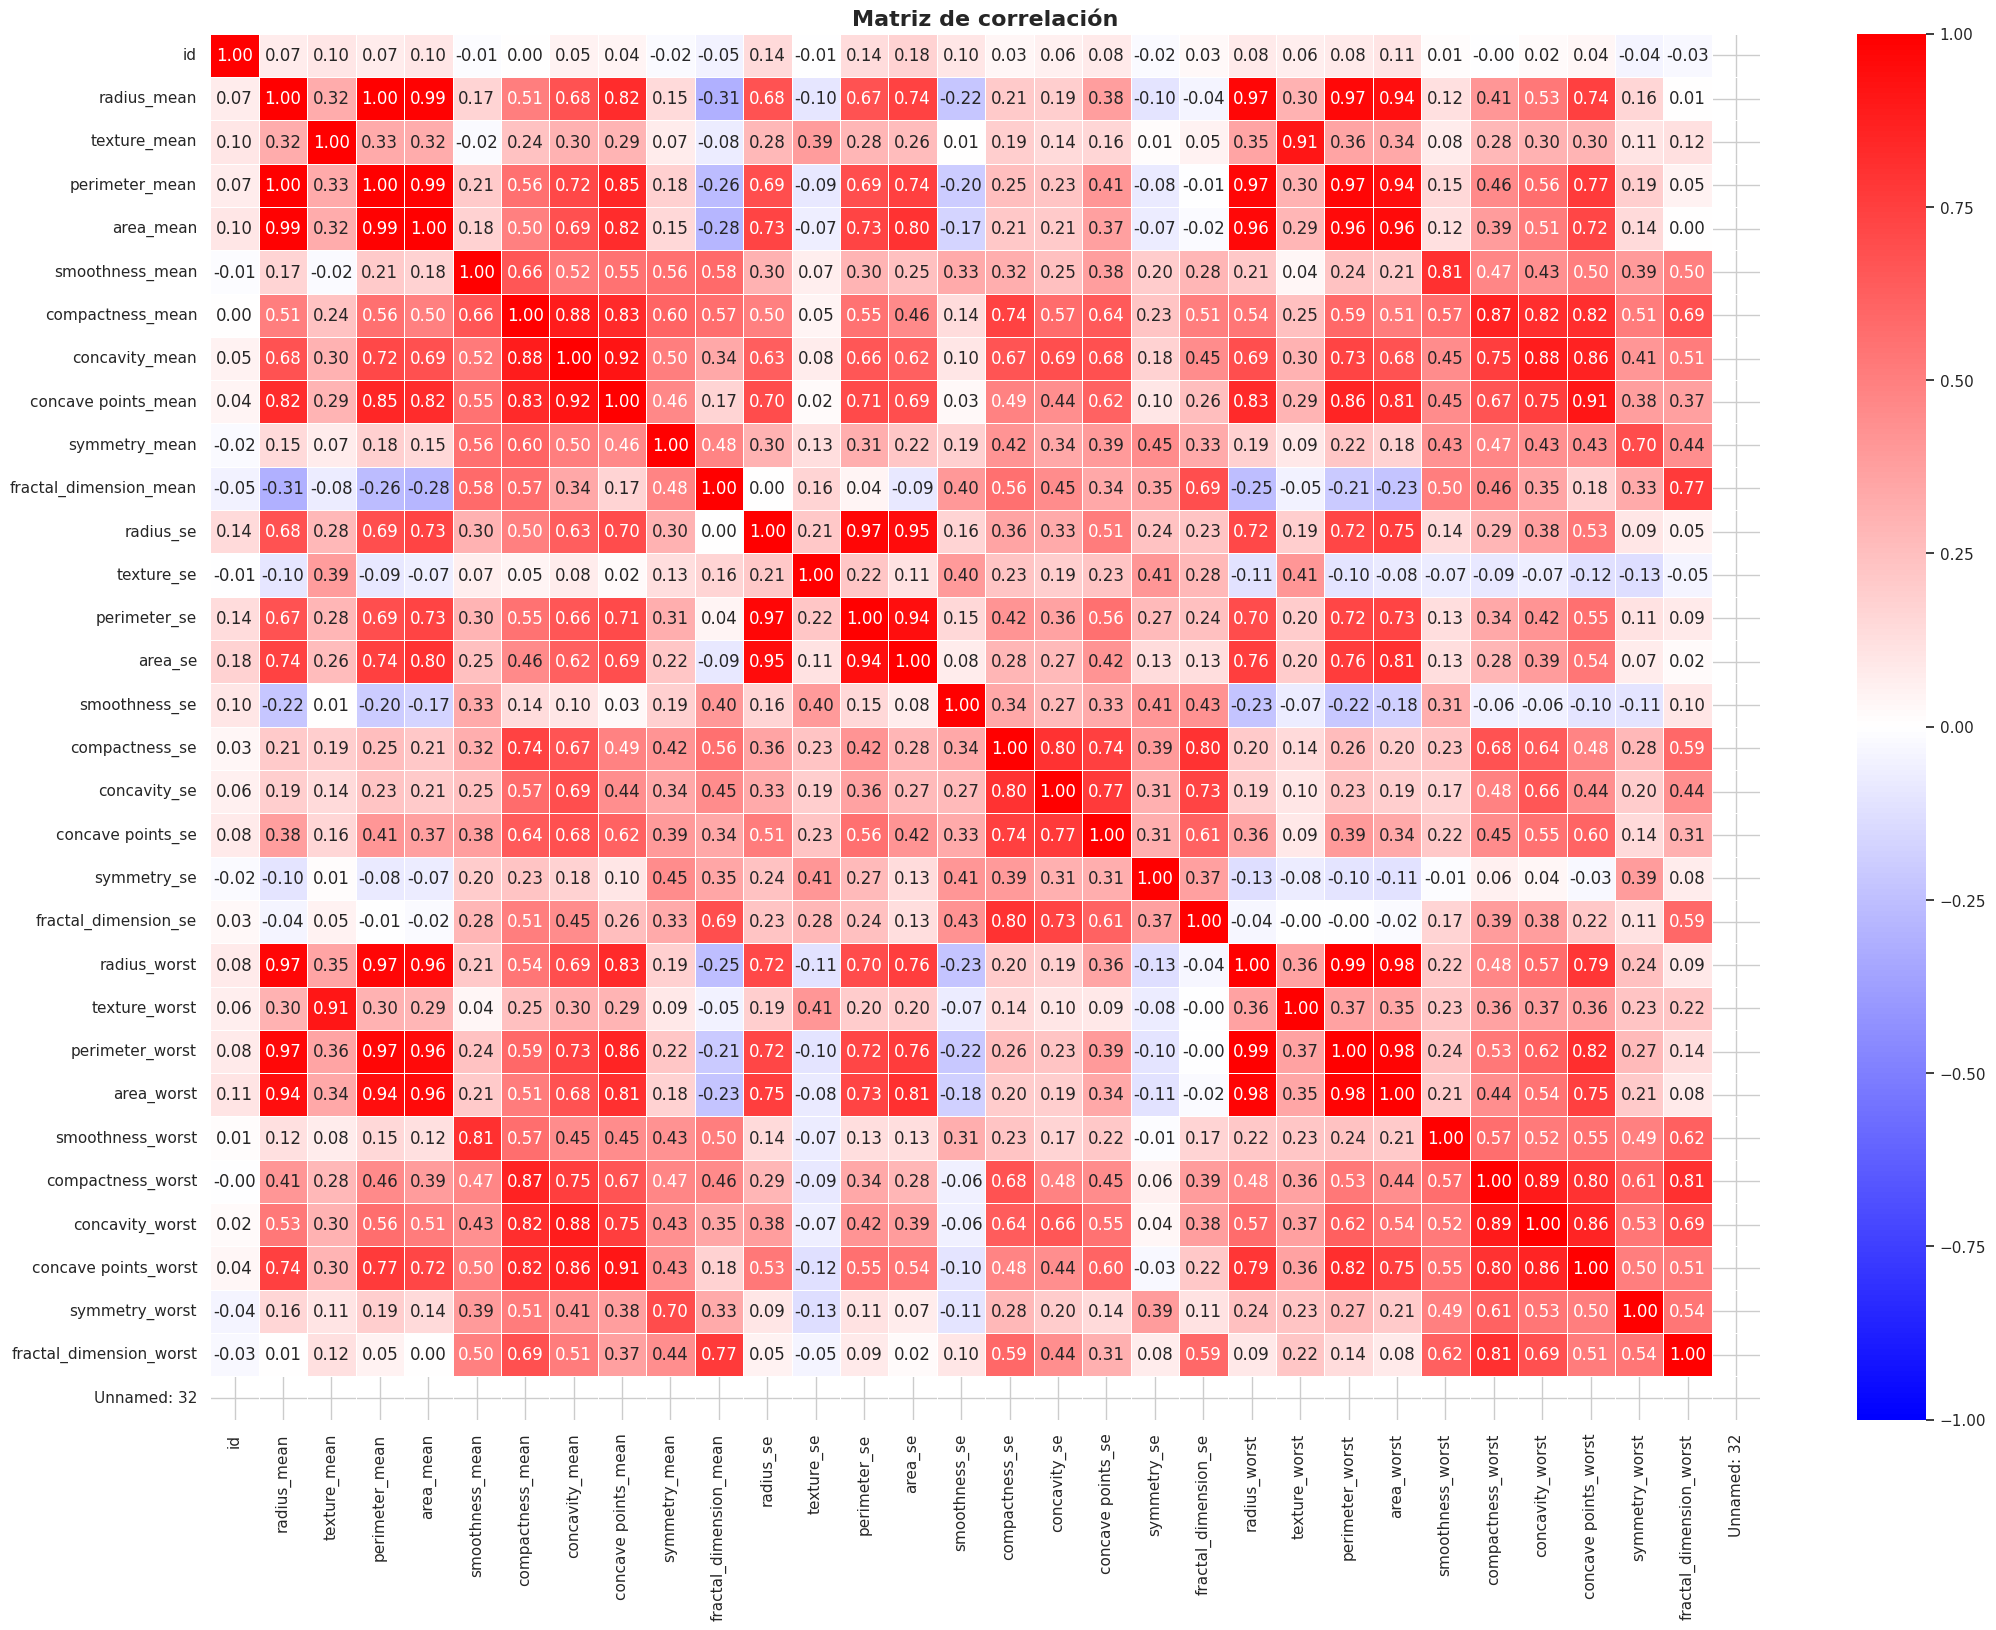

In [11]:
#ANALISIS BIVARIAL

matriz = df.select_dtypes(include=[np.number]).corr() # Aquí selecciono solo las columnas numéricas para la matriz de correlación
plt.figure(figsize=(25, 18))
sns.heatmap(matriz, annot=True, fmt=".2f", cmap="bwr", vmin=-1, vmax=1, linewidths=0.5, cbar=True)
plt.title("Matriz de correlación", fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig("heatmap_correlation.png", dpi=300, bbox_inches='tight')
plt.show()



**Conclusiones y análisis de este heatmap:**

1. Alta correlación entre medidas geométricas: Variables como radius_mean, perimeter_mean, area_mean tienen correlaciones muy altas (>0.9) entre sí. Lo mismo ocurre con sus versiones _worst (radius_worst, perimeter_worst, area_worst).
Lo que implica que en el modelo puede haber redundancia, no necesitamos todas estas variables a la vez si queremos simplificar.

2. Acerca de la estructura triplicada de las variables: Las de tipo _mean y _worst están muy correlacionadas entre sí como: radius_mean vs radius_worst.
Las de tipo _se (standard error) suelen tener menos correlación con mean y worst, lo cual aporta información complementaria sobre la variabilidad de las medidas.
Entonces esto nos confirma que los tres grupos (_mean, _se, _worst) aportan diferente tipo de información, aunque no todas las variables sean igualmente útiles.

3. Hay correlaciones moderadas en variables de textura y simetría (texture_mean, symmetry_mean, fractal_dimension_mean), que parecen menos relacionadas con el resto.

Entonces podemos ver que el dataset tiene grupos de features que se mueven juntas, por lo cual podemos concluir que esto puede ser aprovechado en técnicas de reducción de dimensionalidad (PCA, feature selection).

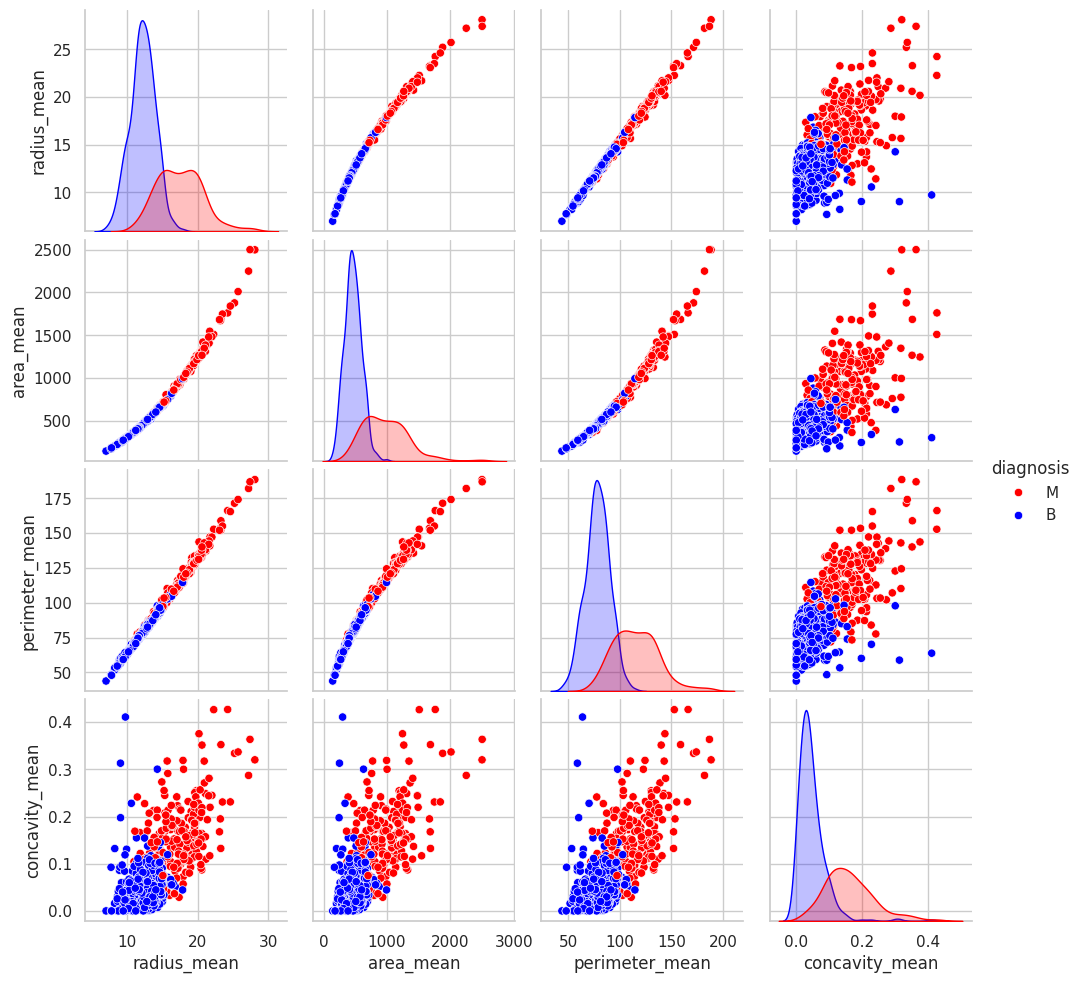

In [12]:
sns.pairplot(df[["radius_mean","area_mean","perimeter_mean","concavity_mean","diagnosis"]],
             hue="diagnosis", diag_kind="kde", palette={'B':'blue','M':'red'})
plt.show()


Este grafico nos confirma lo que vimos en la matriz de correlacion:
radius_mean, area_mean y perimeter_mean están fuertemente correlacionadas.
concavity_mean añade información extra, no depende solo del tamaño sino de la forma.

Además, muestran que las clases B/M se separan bastante bien en estas variables, lo que es bueno porque muestra que el dataset es linealmente separable en algunos casos.

**BALANCE DE LA BASE DE DATOS**

Como se mencionó anteriormente, podía haber una posibilidad de balancear los datos, sin embargo al mirar los porcentajes y proporcion, en concreto es de (63/37), el desbalance no es tan fuerte como si tuvieramos un 95% vs 5% y además según busquedas acerca de los diferentes modelos, algunos de estos como: RandomForest, GradientBoosting, DNN manejan bien este nivel.
Por ello se concluye que el balanceo con undersampling u oversampling no es necesario.

**PUNTO 3, PROCESAMIENTO Y LIMPIEZA DE DATOS**

1. Vamos a eliminar columnas irrelevantes y con valores nulos:

id: que esta es solo un identificador entonces no aporta al modelo.

Unnamed: 32 es una columna vacía, y todas sus muestras son valores nulos.

In [13]:
df = df.drop(columns=['id', 'Unnamed: 32'])
#se vuelve a correr y sale error porque ya las columnas no exixten entonces no se pueden borrar. Se borraron en la primera vez que se corrió.

In [14]:
#Visualizamos tamaño de df nuevo, antes 33, ahora 31 columnas.
df.shape

(569, 31)

In [15]:
print(df.isnull().sum()) #verificamos que ya no hay valores nulos.


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


**Codificación de variables categóricas**

En nuestro caso codificaremos nuestro target que es la unica categorica.
En este caso no haremos label enconding ya que nos daría un orden artificial en categorias que no lo tienen. Y en nuestro caso el one-hot-encoding no es necesario, serían más columnas aún.  
Entonces la convertiremos en binaria:

In [16]:
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


DIVISIÓN DE DATOS


In [17]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

#70-15-15

X_train, X_treinta, y_train, y_treinta = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
    )


In [18]:
X_val, X_test, y_val, y_test = train_test_split(
    X_treinta, y_treinta, test_size=0.50, random_state=42, stratify=y_treinta
)

print("Tamaños:")
print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Tamaños:
Train: (398, 30) (398,)
Val: (85, 30) (85,)
Test: (86, 30) (86,)


**PIPELINE DE PROCESAMIENTO**

Antes de realizar el pipeline, miraremos que tan bien nos resulta hacer PCA y las variables que deberiamos tomar en cuanto a la varianza que nos de.


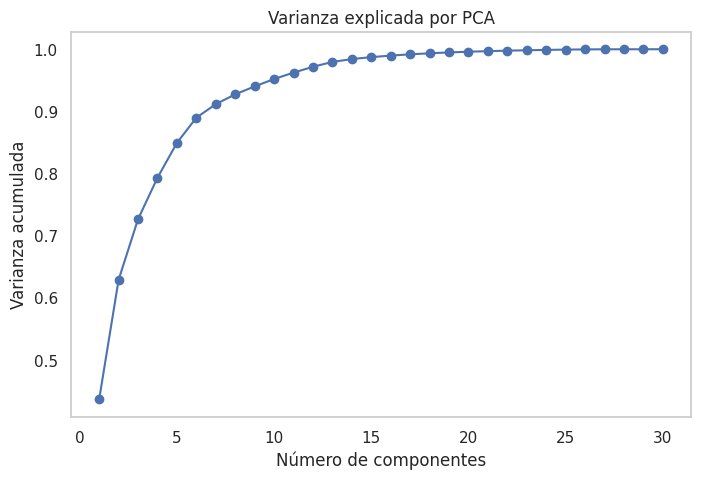

In [19]:
pca = PCA().fit(StandardScaler().fit_transform(X_train))

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.title("Varianza explicada por PCA")
plt.grid()
plt.show()


A partir de esta gráfica se puede concluir que 10 a 15 componentes ya es muy cercano al 100% de varianza, por ello para tener mayor fidelidad se escoger 15 componentes principales.  

PIPELINE

Este solo incluirá la normalización y el analisis de componentes principales, ya que como se probaran varios modelos, todos se haran sobre este pipeline.

In [20]:
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),   # Normalización
    ('pca', PCA(n_components=15))    # PCA a 15 componentes principales
])

# Ajustar el pipeline solo con train
X_train_pca = pipeline_pca.fit_transform(X_train)

# Transformar val y test con el mismo pipeline
X_val_pca = pipeline_pca.transform(X_val)
X_test_pca = pipeline_pca.transform(X_test)

# varianza explicada

print("Varianza explicada acumulada con 15 componentes:",
      pipeline_pca.named_steps['pca'].explained_variance_ratio_.sum())

Varianza explicada acumulada con 15 componentes: 0.9873235872718146


**ENTRENAMIENTO DE MODELOS**



In [21]:

# 1. Modelos clásicos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

#aqui se hace una función para calcular métricas rápido y así luego se pueda hacer la tabla comparativa
def calcular_metricas(modelo, X, y, nombre_set):
    y_pred = modelo.predict(X)

# si el modelo tiene predict_proba calculamos probabilidades( el predict proba devuelve las probabilidades de que una muestra pertenezca a cada clase)
    if hasattr(modelo, "predict_proba"):
        y_proba = modelo.predict_proba(X)[:, 1] #y_proba es y de probabiblidad
    else:
        y_proba = y_pred # retrocede si no tiene y_proba

    return {
        "Dataset": nombre_set,
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred),
        "Recall": recall_score(y, y_pred),
        "F1": f1_score(y, y_pred),
        "ROC-AUC": roc_auc_score(y, y_proba)
    }
# Aqui solo entreno y evaluo los modelos clasicos
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

modelos = {
    "KNN": knn,
    "Random Forest": rf,
    "Gradient Boosting": gb
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train_pca, y_train)
    resultados.append({"Modelo": nombre, **calcular_metricas(modelo, X_train_pca, y_train, "Train")})
    resultados.append({"Modelo": nombre, **calcular_metricas(modelo, X_val_pca, y_val, "Val")})
    resultados.append({"Modelo": nombre, **calcular_metricas(modelo, X_test_pca, y_test, "Test")})


# Ahora el modelo DNN
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

dnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],), #en esta primera capa es el mismo numero de nueronas que las muestras de entrada
          kernel_regularizer=regularizers.l2(1e-3)), #L2, # parametro para evitar overfitting, w no valores altos
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-3)),
    Dense(1, activation='sigmoid')
])

dnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = tf.keras.callbacks.EarlyStopping( #El early stop es para que el modelo pare cuadno no haya mas mejora
    monitor='val_loss',
    patience=5,   #Aqui es que cuando ya se cumplen 5 epocas y no hay mejoría entonces para
    restore_best_weights=True
)

history = dnn.fit( #.fit nos devuelve un objeto History el cual se guarda en la variable history, ese objeto guarda toda la información del entrenamiento por épocas, entonces es como un registro del entrenamiento.
    X_train_pca, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val_pca, y_val),
    callbacks=[early_stop],
    verbose=0
)

# Evaluación DNN
for X, y, split in [(X_train_pca, y_train, "Train"),
                    (X_val_pca, y_val, "Val"),
                    (X_test_pca, y_test, "Test")]:
    y_proba = dnn.predict(X).ravel()
    y_pred = (y_proba > 0.5).astype("int32")
    resultados.append({   #Aqui algunos se hacen con y_pred y otros con y_proba, esto depende de la metrica con que trabaje.
        "Modelo": "DNN",
        "Dataset": split,
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred),
        "Recall": recall_score(y, y_pred),
        "F1": f1_score(y, y_pred),
        "ROC-AUC": roc_auc_score(y, y_proba)
    })

# 3. Tabla final
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
               Modelo Dataset  Accuracy  Precision    Recall        F1  \
0                 KNN   Train  0.972362   0.992806  0.932432  0.961672   
1                 KNN     Val  0.964706   1.000000  0.906250  0.950820   
2                 KNN    Test  0.965116   1.000000  0.906250  0.950820   
3       Random Forest   Train  1.000000   1.000000  1.000000  1.000000   
4       Random Forest     Val  0.929412   0.933333  0.875000  0.903226   
5       Random Forest    Test  0.976744   1.000000  0.937500  0.967742   
6   Gradient Boosting   Train  1.000000   1.000000  1.000000  1.000000   
7   Gradient Boosting     Val  0.952941   0.966667  0.906250  0.935484   
8   Gradient Boosting    Test  0.976744   1.000000  0.937500  0.967742   
9                 DNN   Train  0.989950   0.993151  0.979730  0.986395   
10                DNN     Val  0.988235   1.000000  0.968750  0.984127

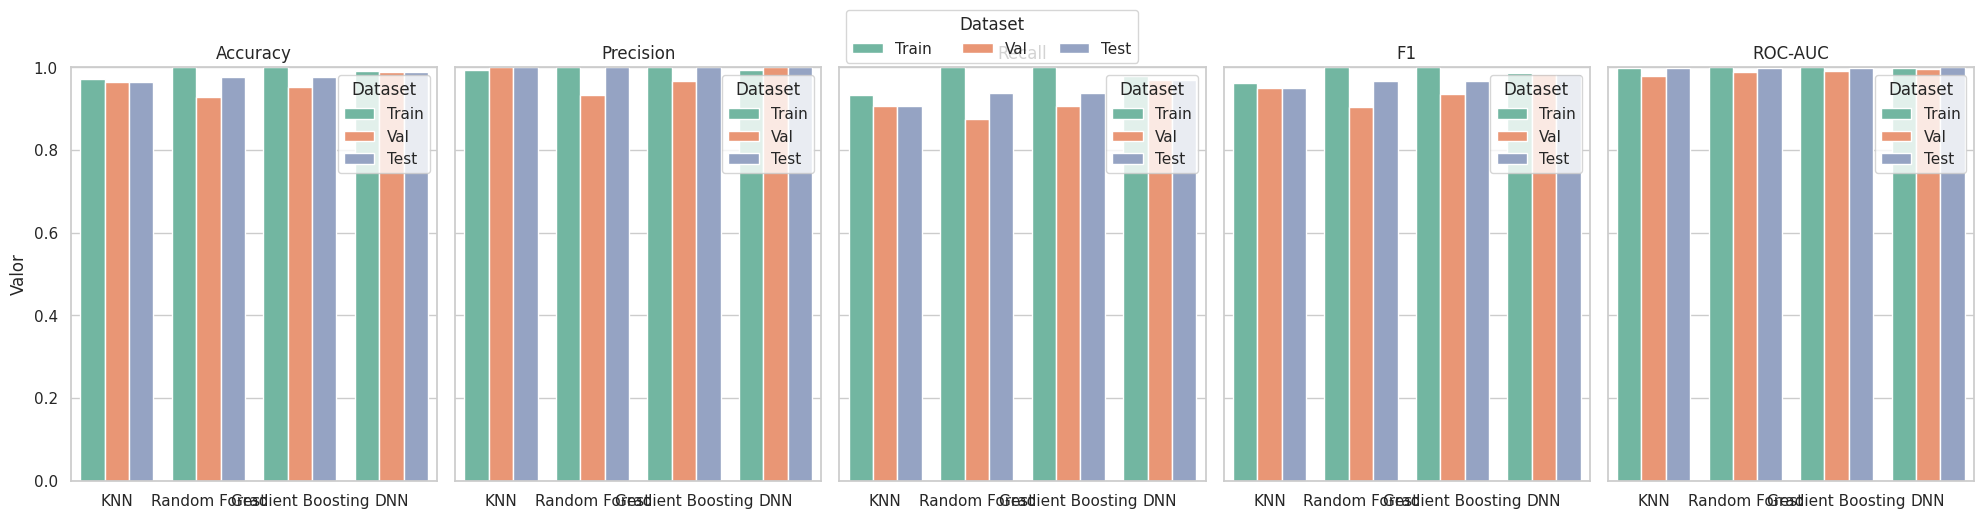

In [22]:


sns.set(style="whitegrid")

# Creamos subplots
fig, axes = plt.subplots(1, 5, figsize=(20,5), sharey=True)

# Asignamos cada métrica a un subplot
sns.barplot(data=df_resultados, x='Modelo', y='Accuracy', hue='Dataset', palette='Set2', ax=axes[0])
axes[0].set_title('Accuracy')
axes[0].set_xlabel('')
axes[0].set_ylabel('Valor')
axes[0].set_ylim(0,1)

sns.barplot(data=df_resultados, x='Modelo', y='Precision', hue='Dataset', palette='Set2', ax=axes[1])
axes[1].set_title('Precision')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_ylim(0,1)

sns.barplot(data=df_resultados, x='Modelo', y='Recall', hue='Dataset', palette='Set2', ax=axes[2])
axes[2].set_title('Recall')
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].set_ylim(0,1)

sns.barplot(data=df_resultados, x='Modelo', y='F1', hue='Dataset', palette='Set2', ax=axes[3])
axes[3].set_title('F1')
axes[3].set_xlabel('')
axes[3].set_ylabel('')
axes[3].set_ylim(0,1)

sns.barplot(data=df_resultados, x='Modelo', y='ROC-AUC', hue='Dataset', palette='Set2', ax=axes[4])
axes[4].set_title('ROC-AUC')
axes[4].set_xlabel('')
axes[4].set_ylabel('')
axes[4].set_ylim(0,1)

# Leyenda general
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title='Dataset', bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=3)

plt.tight_layout()
plt.show()


B. Analisis de resultados

En general todos los modelos tuvieron buenas metricas, >0.93 en accuracy, precision y recall.
Analisando cada modelo:
KNN
Train: Accuracy ≈ 0.97, Recall ≈ 0.93.
Val/Test: Accuracy ≈ 0.96, Recall ≈ 0.90.
Este modelo tuvo buen rendimiento general, aunque el recall baja un poco en validación/test, lo que indica que puede confundir algunos casos malignos.

Random Forest
Train: Accuracy y Recall = 1.00 (perfecto).
Val/Test: Accuracy ≈ 0.93–0.97, Recall ≈ 0.87–0.94.
Este modelo tuvo un excelente en entrenamiento (posible sobreajuste), pero en validación baja el recall.
Aún así, en test mantiene un muy buen desempeño (0.97 accuracy, 0.94 recall).

Gradient Boosting
Train: Perfecto (Accuracy y Recall = 1.00).
Val/Test: Accuracy ≈ 0.95–0.97, Recall ≈ 0.90–0.94.
Fue similar a Random Forest, algo de sobreajuste en entrenamiento, pero generaliza muy bien.

DNN (con L2 + Dropout + EarlyStopping)
Train: Accuracy ≈ 0.99, Recall ≈ 0.97.
Val/Test: Accuracy ≈ 0.99–1.00, Recall ≈ 0.97–1.00.
Es el modelo con mejor balance entre train, val y test.
El uso de regularización y early stopping ayudó a controlar el sobreajuste.
Alcanzó Recall de 1.00 en test, lo cual es muy importante en un problema médico  porque no dejar pasar casos malignos.

¿Cuál modelo tuvo mejor desempeño?
Como se mencionó DNN fue el modelo con mejor balance entre los conjuntos de datos, es la más robusta y equilibrada, con rendimiento casi perfecto en todos los conjuntos. Pienso que esto debido a la utulizacón de las funciones adecuadas de activación y de regularización.

¿Alguno presentó overfitting o underfitting? ¿Cómo lo
detectó?
Al analizar las métricas obtenidas, se observa que los modelos Random Forest y Gradient Boosting presentan signos claros de overfitting. Ambos alcanzaron un rendimiento perfecto en el conjunto de entrenamiento (Accuracy, Precision, Recall y F1 = 1.00), lo que indica que el modelo fue capaz de memorizar los patrones de los datos de train. Sin embargo, al evaluar en los conjuntos de validación y prueba, sus métricas disminuyen ligeramente (Accuracy ≈ 0.93–0.97, Recall ≈ 0.87–0.94). Con esta diferencia podemos ver que los modelos no generalizan de forma tan efectiva a datos nuevos, lo que es una característica típica del sobreajuste en algoritmos basados en árboles que crecen demasiado complejos si no se regulan.

El modelo seleccionado para producción es la red neuronal profunda (DNN), ya que mostró el mejor equilibrio entre rendimiento en entrenamiento, validación y prueba. Mientras que Random Forest y Gradient Boosting alcanzaron métricas perfectas en entrenamiento pero evidenciaron cierto sobreajuste al disminuir en validación y prueba, la DNN mantuvo valores prácticamente idénticos en todos los conjuntos gracias al uso de técnicas de regularización (L2, Dropout) y EarlyStopping.
Este modelo ofrece el mejor balance entre sensibilidad, precisión y control de sobreajuste, asegurando un alto nivel de confianza en la detección temprana de cáncer.

PUNTO 5. MUESTRA ARTIFICIAL

In [23]:
import pandas as pd
import numpy as np

# 1. Crear muestra artificial (ejemplo con valores ficticios dentro de rangos realistas)
sample = {
    "radius_mean": [15.0],
    "texture_mean": [20.0],
    "perimeter_mean": [100.0],
    "area_mean": [800.0],
    "smoothness_mean": [0.1],
    "compactness_mean": [0.2],
    "concavity_mean": [0.2],
    "concave points_mean": [0.1],
    "symmetry_mean": [0.2],
    "fractal_dimension_mean": [0.06],
    "radius_se": [0.5],
    "texture_se": [1.0],
    "perimeter_se": [3.0],
    "area_se": [40.0],
    "smoothness_se": [0.005],
    "compactness_se": [0.02],
    "concavity_se": [0.03],
    "concave points_se": [0.01],
    "symmetry_se": [0.02],
    "fractal_dimension_se": [0.003],
    "radius_worst": [20.0],
    "texture_worst": [30.0],
    "perimeter_worst": [130.0],
    "area_worst": [1200.0],
    "smoothness_worst": [0.15],
    "compactness_worst": [0.25],
    "concavity_worst": [0.3],
    "concave points_worst": [0.1],
    "symmetry_worst": [0.3],
    "fractal_dimension_worst": [0.08]
}

# 2. Convertir en DataFrame
sample_df = pd.DataFrame(sample)

# 3. Procesar con pipeline (scaler + PCA)
sample_pca = pipeline_pca.transform(sample_df)

# 4. Predecir con el modelo DNN
prediction = dnn.predict(sample_pca)
predicted_class = (prediction > 0.5).astype("int32")

print("Probabilidad de ser maligno:", prediction[0][0])
print("Predicción final:", "Maligno" if predicted_class[0][0] == 1 else "Benigno")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Probabilidad de ser maligno: 0.9986438
Predicción final: Maligno


In [24]:
sample_benign = {
    "radius_mean": [9.5],
    "texture_mean": [13.0],
    "perimeter_mean": [65.0],
    "area_mean": [250.0],
    "smoothness_mean": [0.08],
    "compactness_mean": [0.05],
    "concavity_mean": [0.02],
    "concave points_mean": [0.01],
    "symmetry_mean": [0.15],
    "fractal_dimension_mean": [0.06],
    "radius_se": [0.2],
    "texture_se": [0.7],
    "perimeter_se": [1.5],
    "area_se": [20.0],
    "smoothness_se": [0.002],
    "compactness_se": [0.01],
    "concavity_se": [0.005],
    "concave points_se": [0.002],
    "symmetry_se": [0.01],
    "fractal_dimension_se": [0.002],
    "radius_worst": [11.0],
    "texture_worst": [15.0],
    "perimeter_worst": [75.0],
    "area_worst": [300.0],
    "smoothness_worst": [0.1],
    "compactness_worst": [0.07],
    "concavity_worst": [0.01],
    "concave points_worst": [0.005],
    "symmetry_worst": [0.2],
    "fractal_dimension_worst": [0.06]
}

# Convertir a DataFrame
sample_benign_df = pd.DataFrame(sample_benign)

# Procesar con pipeline
sample_benign_pca = pipeline_pca.transform(sample_benign_df)

# Predecir con DNN
prediction_benign = dnn.predict(sample_benign_pca)
predicted_class_benign = (prediction_benign > 0.5).astype("int32")

print("Probabilidad de ser maligno:", prediction_benign[0][0])
print("Predicción final:", "Maligno" if predicted_class_benign[0][0] == 1 else "Benigno")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Probabilidad de ser maligno: 5.313704e-06
Predicción final: Benigno


¿El resultado tiene sentido?

Primer ejemplo con valores altos en radio, perímetro, área, concavidad, el modelo predijo Maligno, lo cual es coherente con la biología real del cáncer de mama: los tumores malignos suelen ser más grandes e irregulares.

Segundo ejemplo con los valores bajos y suaves, poca concavidad, el modelo predijo Benigno, y además con una probabilidad extremadamente baja de maligno (≈ 0.0000025), lo que indica que está muy seguro de esa clasificación.

¿Que pasa si cambio variables de la muestra?

Al modificar variables clave como radio, área y concavidad hacia valores más altos, la predicción cambia de benigno a maligno. Esto demuestra que el modelo aprendió la relación entre tamaño/forma del tumor y la probabilidad de cáncer maligno, lo cual es coherente con la realidad clínica. En cambio, si se modifican variables de menor importancia, la predicción se mantiene estable, lo que sugiere que el modelo es robusto a pequeñas variaciones. Esto tambien debido al analisis de componentes principales que son las que mas varianza nos aportan, y con ello se demuestra que hubo un buen tratamiento, manejo y limpieza de datos, optimizando asì el proceso.